In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pwd

'C:\\Users\\willn\\SynergisticIT\\Data Science\\Association Rule'

In [4]:
phone_df = pd.read_csv('myphonedata.csv')
phone_df.head()

,V1,V2,V3,red,white,green,yellow,orange,blue
0,red,white,green,1,1,1,0,0,0
1,white,orange,NaN,0,1,0,0,1,0
2,white,blue,NaN,0,1,0,0,0,1
3,red,white,orange,1,1,0,0,1,0
4,red,blue,NaN,1,0,0,0,0,1


In [5]:
phone_df.shape

(11, 9)

In [6]:
phone_df.head(11)

,V1,V2,V3,red,white,green,yellow,orange,blue
0,red,white,green,1,1,1,0,0,0
1,white,orange,NaN,0,1,0,0,1,0
2,white,blue,NaN,0,1,0,0,0,1
3,red,white,orange,1,1,0,0,1,0
4,red,blue,NaN,1,0,0,0,0,1
5,white,blue,NaN,0,1,0,0,0,1
6,red,blue,NaN,1,0,0,0,0,1
7,red,white,blue,1,1,0,0,0,1
8,green,NaN,NaN,0,0,1,0,0,0
9,red,white,blue,1,1,0,0,0,1


In [7]:
# all data columns and row have a total greater than 0 so all data columns and rows are usable for analysis
# separate frequency dummy data

phone_clean_df = phone_df.iloc[:, 3:]
phone_clean_df

,red,white,green,yellow,orange,blue
0,1,1,1,0,0,0
1,0,1,0,0,1,0
2,0,1,0,0,0,1
3,1,1,0,0,1,0
4,1,0,0,0,0,1
5,0,1,0,0,0,1
6,1,0,0,0,0,1
7,1,1,0,0,0,1
8,0,0,1,0,0,0
9,1,1,0,0,0,1


In [8]:
# import apriori and association_rules from mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

In [9]:
# up apriori to find frequent item sets/collections/frequent_itemsets
frequent_itemsets = apriori(phone_clean_df, min_support = 0.0909, max_len=3, use_colnames=True)
frequent_itemsets

C:\Users\willn\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.545455,(red)
1,0.636364,(white)
2,0.181818,(green)
3,0.090909,(yellow)
4,0.181818,(orange)
5,0.545455,(blue)
6,0.363636,"(red, white)"
7,0.090909,"(red, green)"
8,0.090909,"(red, orange)"
9,0.363636,"(red, blue)"


In [10]:
print(type(frequent_itemsets))

<class 'pandas.core.frame.DataFrame'>


In [11]:
# sort support values in descending order
frequent_itemsets.sort_values('support', ascending=False, inplace=True)

In [19]:
# messing around trying to add a column with the length of the tuple itemsets to groups of same number pairings can be seen

#for i,row in frequent_itemsets.iterrows():
    #combo2 = []
    #combo3 = []
    #if len(row[1]) == 2:
        #combo2.append(i)
        
#print(combo2)


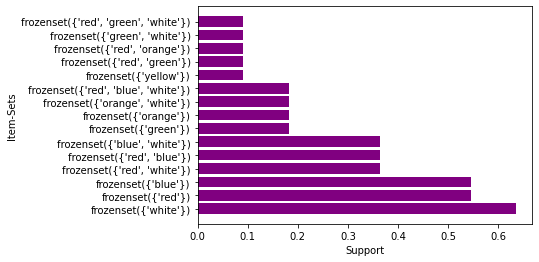

In [14]:
# plot frequency data (usually top 10 if large dataset, but all 15 will fit easy enough)
plt.barh(y=list(range(0,15)), width=frequent_itemsets.support[0:15], color='purple')
plt.yticks(list(range(0,15)), frequent_itemsets.itemsets[0:15], rotation = 0)
plt.ylabel('Item-Sets')
plt.xlabel('Support')
plt.show()